<a href="https://colab.research.google.com/github/hanbitgoun/GJ_AI/blob/main/deep_learning/0728_0730_d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf

In [ ]:
red = pd.read_csv('/content/winequality-red.csv', sep = ';') # : 기점으로 데이터 분리
white = pd.read_csv('/content/winequality-white.csv', sep=';')
display(red.head())
display(white.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# 데이터 통합 & red / white 구분 > 변수 추가
red['type'] = 0
white['type'] = 1
print(red.head(2))
print(white.head(2))

   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.4              0.70          0.0  ...      9.4        5     0
1            7.8              0.88          0.0  ...      9.8        5     0

[2 rows x 13 columns]
   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.0              0.27         0.36  ...      8.8        6     1
1            6.3              0.30         0.34  ...      9.5        6     1

[2 rows x 13 columns]


#### 데이터 확인

In [ ]:
wine = pd.concat( [red, white] )
display(wine.describe())
# 결측치 x / total sulfur dioxide 편차 큼 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


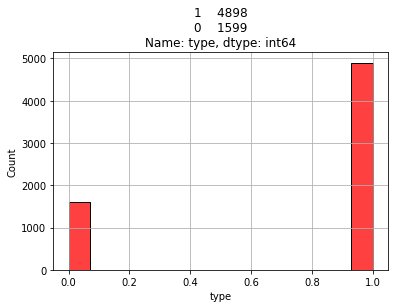

In [ ]:
# type 평균 0.7 > 데이터 1로 쏠려있음 > 확인하기 위해 시각화
sns.histplot(wine['type'], color='red')
plt.title('{}'.format(wine['type'].value_counts()))

plt.grid()
plt.show()
# 다음시간에 0 두배로 키우는 방법

#### 데이터 분리

In [ ]:
# 셔플 왜? 학습불균형 막기위함
wine_shuflle = wine.sample(frac=1)
wine_shuflle.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
83,7.3,0.22,0.30,8.2,0.047,42.0,207.0,0.99660,3.33,0.46,9.5,6,1
1068,11.1,0.31,0.53,2.2,0.060,3.0,10.0,0.99572,3.02,0.83,10.9,7,0
3852,5.9,0.20,0.23,1.5,0.037,38.0,93.0,0.99021,3.36,0.49,12.0,6,1
4669,5.9,0.44,0.33,1.2,0.049,12.0,117.0,0.99134,3.46,0.44,11.5,5,1
1081,7.9,0.30,0.68,8.3,0.050,37.5,289.0,0.99316,3.01,0.51,12.3,7,0


In [ ]:
# to_numpy
wine_np = wine_shuflle.to_numpy()
type(wine_np)

numpy.ndarray

In [ ]:
train_ratio = 0.8

print("Total Datset Index : ", len(wine_np))
test_begin_index = int(len(wine_np) * train_ratio) # 테스트 데이터 시작하는 위치
print("test_begin_index : ", test_begin_index)

Total Datset Index :  6497
test_begin_index :  5197


In [ ]:
train_X, train_Y = wine_np[ :test_begin_index, :-1 ], wine_np[ :test_begin_index, -1]
test_X, test_Y   = wine_np[ test_begin_index:, :-1 ], wine_np[ test_begin_index:, -1]

In [ ]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(5197, 12)
(5197,)
(1300, 12)
(1300,)


In [ ]:
print('Before categorical : \n')
print(train_Y[0])
print(train_Y[1])
print(train_Y[2])

Before categorical : 

1.0
1.0
1.0


red_wine   = 0 > (1, 0)

white_wine = 1 > (0, 1)



In [ ]:
train_Y_to_categorical = tf.keras.utils.to_categorical(train_Y, num_classes = 2)
test_Y_to_categorical  = tf.keras.utils.to_categorical(test_Y, num_classes =  2)

print('After categorical : \n')
print(train_Y_to_categorical[0])
print(train_Y_to_categorical[1])
print(train_Y_to_categorical[2])

After categorical : 

[0. 1.]
[1. 0.]
[0. 1.]


In [ ]:
train_Y_to_categorical.shape

(5197, 2)

#### model

In [ ]:
model_swish_sigmoid = tf.keras.Sequential([
                                           tf.keras.layers.Dense(units=48, activation='swish', input_shape = (12,)),
                                           tf.keras.layers.Dense(units=24, activation='swish'),
                                           tf.keras.layers.Dense(units=12, activation='swish'),
                                           tf.keras.layers.Dense(units=2, activation='sigmoid')
])

In [ ]:
model_swish_sigmoid.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07),
                            loss = 'binary_crossentropy',
                            metrics = ['accuracy'])

In [ ]:
model_swish_sigmoid.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 48)                624       
_________________________________________________________________
dense_13 (Dense)             (None, 24)                1176      
_________________________________________________________________
dense_14 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model_swish_sigmoid.fit(train_X, train_Y_to_categorical,
                                 epochs = 25, batch_size = 32, validation_split = 0.2,
                                 callbacks = [tf.keras.callbacks.EarlyStopping(patience=3,
                                                                      monitor = 'val_loss')])

Epoch 1/25
130/130 [==============================] - 1s 3ms/step - loss: 0.3732 - accuracy: 0.9011 - val_loss: 0.1814 - val_accuracy: 0.9413
Epoch 2/25
130/130 [==============================] - 0s 2ms/step - loss: 0.2681 - accuracy: 0.9180 - val_loss: 0.1719 - val_accuracy: 0.9481
Epoch 3/25
130/130 [==============================] - 0s 2ms/step - loss: 0.2294 - accuracy: 0.9274 - val_loss: 0.1654 - val_accuracy: 0.9433
Epoch 4/25
130/130 [==============================] - 0s 2ms/step - loss: 0.1714 - accuracy: 0.9427 - val_loss: 0.2136 - val_accuracy: 0.9442
Epoch 5/25
130/130 [==============================] - 0s 2ms/step - loss: 0.1762 - accuracy: 0.9437 - val_loss: 0.1661 - val_accuracy: 0.9567
Epoch 6/25
130/130 [==============================] - 0s 2ms/step - loss: 0.1795 - accuracy: 0.9466 - val_loss: 0.0852 - val_accuracy: 0.9760
Epoch 7/25
130/130 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.7686 - val_loss: 0.5562 - val_accuracy: 0.7567
Epoch 

In [ ]:
model_swish_sigmoid.evaluate(test_X, test_Y_to_categorical)

41/41 [==============================] - 0s 1ms/step - loss: 0.4616 - accuracy: 0.8208


[0.461570143699646, 0.8207692503929138]

In [ ]:
pred_Y = model_swish_sigmoid.predict(test_X)
print(np.round(pred_Y[:20], 2))

[[0.15 0.85]
 [0.15 0.85]
 [0.15 0.85]
 [0.15 0.85]
 [0.15 0.85]
 [0.15 0.85]
 [0.15 0.85]
 [0.15 0.85]
 [0.15 0.85]
 [0.15 0.85]
 [0.15 0.85]
 [0.15 0.85]
 [0.15 0.85]
 [0.15 0.85]
 [0.15 0.85]
 [0.15 0.85]
 [1.   0.  ]
 [0.15 0.85]
 [0.15 0.85]
 [0.15 0.85]]


In [ ]:
print(np.round(pred_Y[:10]))

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
print(np.round(test_Y_to_categorical[:10]))

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


#### 시각화

In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

val_loss = history.history['val_loss']
loss = history.history['loss']

In [ ]:
val_accuracy # epoch = 7 

[0.9413461685180664,
 0.9480769038200378,
 0.9432692527770996,
 0.9442307949066162,
 0.9567307829856873,
 0.9759615659713745,
 0.7567307949066162,
 0.9384615421295166,
 0.8365384340286255]

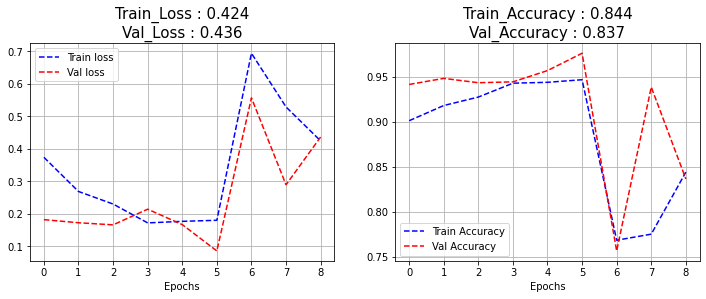

In [ ]:
plt.figure(figsize = (12, 4) )
plt.subplot(1, 2, 1)

plt.plot(history.history['loss'], 'b--', label = 'Train loss')
plt.plot(history.history['val_loss'], 'r--', label = 'Val loss')

plt.xlabel('Epochs')

plt.title('Train_Loss : {:.3f}\nVal_Loss : {:.3f}'.\
          format(loss[-1], val_loss[-1]), fontsize=15)

plt.legend()
plt.grid()

plt.subplot(1, 2, 2)

plt.plot(history.history['accuracy'], 'b--', label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label = 'Val Accuracy')

plt.xlabel('Epochs')

plt.title('Train_Accuracy : {:.3f}\nVal_Accuracy : {:.3f}'.\
          format(accuracy[-1], val_accuracy[-1]), fontsize=15)

plt.legend()
plt.grid()
plt.show()

#### 모델 저장

In [ ]:
model_swish_sigmoid_no_onehot.save('model_swish_sigmoid_no_onehot.h5')

#### 0730

In [ ]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [ ]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

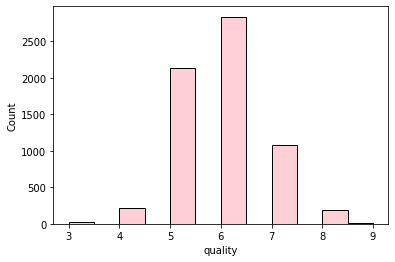

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(wine['quality'], color='pink',binwidth=0.5)
plt.show()

#### 데이터 묶어주기

In [ ]:
wine.loc[ wine['quality'] <= 5, 'new_quality' ] = 0
wine.loc[ wine['quality'] == 6, 'new_quality' ] = 1
wine.loc[ wine['quality'] >= 7, 'new_quality' ] = 2

In [ ]:
wine['new_quality'].value_counts()

1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64

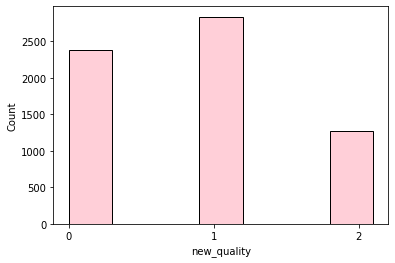

In [ ]:
sns.histplot(wine['new_quality'], color='pink',binwidth=0.3)
plt.xticks(ticks=[0, 2, 1])
plt.show()

In [ ]:
# quality 삭제
del wine['quality']
display(wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,new_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,1.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,0.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,1.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,2.0


#### 정규화

In [ ]:
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())

In [ ]:
display(wine_norm)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,new_quality
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.0,0.0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.0,0.0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.0,0.0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.0,0.5
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,0.198347,0.086667,0.174699,0.015337,0.049834,0.079861,0.198157,0.077694,0.426357,0.157303,0.463768,1.0,0.5
4894,0.231405,0.160000,0.216867,0.113497,0.063123,0.194444,0.373272,0.150183,0.333333,0.134831,0.231884,1.0,0.0
4895,0.223140,0.106667,0.114458,0.009202,0.053156,0.100694,0.241935,0.104685,0.209302,0.134831,0.202899,1.0,0.5
4896,0.140496,0.140000,0.180723,0.007669,0.021595,0.065972,0.239631,0.030461,0.480620,0.089888,0.695652,1.0,1.0


In [ ]:
wine_shuflle = wine_norm.sample(frac=1)
wine_np      = wine_shuflle.to_numpy()

In [ ]:
train_ratio = 0.8
train_idx = int(len(wine_np) * train_ratio)

In [ ]:
print("Total dataset index : ", len(wine_np))
print("Train_index : ", train_idx)

Total dataset index :  6497
Train_index :  5197


#### 데이터 분리

In [ ]:
train_X, train_Y = wine_np[ : train_idx , : -1 ], wine_np[   :  train_idx , -1 :  ]
test_X, test_Y   = wine_np[ train_idx : , : -1 ], wine_np[   train_idx  : , -1 :  ]

In [ ]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(5197, 12)
(5197, 1)
(1300, 12)
(1300, 1)


#### one-hot vector

In [ ]:
train_Y_to_categorical = tf.keras.utils.to_categorical(train_Y, num_classes = 3)
test_Y_to_categorical  = tf.keras.utils.to_categorical(test_Y, num_classes = 3)

print(train_X.shape)
print(train_Y_to_categorical.shape)
print(test_X.shape)
print(test_Y_to_categorical.shape)

(5197, 12)
(5197, 3)
(1300, 12)
(1300, 3)


In [ ]:
model_swish_softmax = tf.keras.Sequential([
                                           tf.keras.layers.Dense(units=48, activation='swish', input_shape=(12,)),
                                           tf.keras.layers.Dense(units=24, activation='swish'),
                                           tf.keras.layers.Dense(units=12, activation='swish'),
                                           tf.keras.layers.Dense(units=3,  activation='softmax')
])

In [ ]:
model_swish_softmax.compile(optimizer=tf.keras.optimizers.Adam(),
                            loss = 'categorical_crossentropy',
                            metrics = ['accuracy'])

In [ ]:
model_swish_softmax.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 48)                624       
_________________________________________________________________
dense_13 (Dense)             (None, 24)                1176      
_________________________________________________________________
dense_14 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 39        
Total params: 2,139
Trainable params: 2,139
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model_swish_softmax.fit(train_X, train_Y_to_categorical,
                                  epochs           = 200,
                                  batch_size       = 32,
                                  validation_split = 0.2,
                                  callbacks = [tf.keras.callbacks.EarlyStopping(patience=3)])

Epoch 1/200
130/130 [==============================] - 1s 3ms/step - loss: 0.6459 - accuracy: 0.8109 - val_loss: 0.4993 - val_accuracy: 0.7962
Epoch 2/200
130/130 [==============================] - 0s 2ms/step - loss: 0.4457 - accuracy: 0.8136 - val_loss: 0.4563 - val_accuracy: 0.7962
Epoch 3/200
130/130 [==============================] - 0s 2ms/step - loss: 0.4134 - accuracy: 0.8145 - val_loss: 0.4384 - val_accuracy: 0.8038
Epoch 4/200
130/130 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.8213 - val_loss: 0.4223 - val_accuracy: 0.8058
Epoch 5/200
130/130 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.8232 - val_loss: 0.4178 - val_accuracy: 0.8106
Epoch 6/200
130/130 [==============================] - 0s 2ms/step - loss: 0.3942 - accuracy: 0.8234 - val_loss: 0.4151 - val_accuracy: 0.8067
Epoch 7/200
130/130 [==============================] - 0s 2ms/step - loss: 0.3890 - accuracy: 0.8217 - val_loss: 0.4123 - val_accuracy: 0.8106

#### 시각화

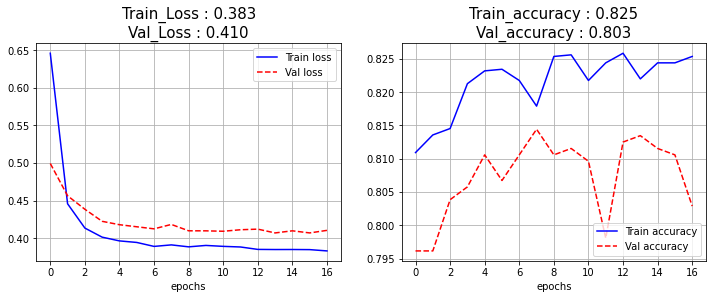

In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

val_loss = history.history['val_loss']
loss = history.history['loss']

plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)

plt.plot(history.history['loss'], 'b-', label = 'Train loss')
plt.plot(history.history['val_loss'], 'r--', label = 'Val loss')
plt.xlabel('epochs')

plt.title('Train_Loss : {:.3f}\nVal_Loss : {:.3f}'.\
          format(loss[-1], val_loss[-1]), fontsize = 15)

plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b-', label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label = 'Val accuracy')
plt.xlabel('epochs')

plt.title('Train_accuracy : {:.3f}\nVal_accuracy : {:.3f}'.\
          format(accuracy[-1], val_accuracy[-1]), fontsize = 15)

plt.legend()
plt.grid()
plt.show()

In [ ]:
pred_Y = model_swish_softmax.predict(test_X)
print("pred_Y : \n", pred_Y[:5])

pred_Y : 
 [[6.2151533e-01 3.7843007e-01 5.4576267e-05]
 [8.7265623e-01 1.2718810e-01 1.5557697e-04]
 [9.5711005e-01 4.2708918e-02 1.8110036e-04]
 [7.3045540e-01 2.6944467e-01 9.9925324e-05]
 [6.5416896e-01 3.4536260e-01 4.6842187e-04]]


In [ ]:
pred_Y_round = np.round(pred_Y, 2)
print(pred_Y_round[:5])

[[0.62 0.38 0.  ]
 [0.87 0.13 0.  ]
 [0.96 0.04 0.  ]
 [0.73 0.27 0.  ]
 [0.65 0.35 0.  ]]


In [ ]:
pred_Y_round = np.round(pred_Y, 2)
print(pred_Y_round[:5])

print("=========예측값===========")
pred_Y_argmax = np.argmax(pred_Y_round, axis=1)
print(pred_Y_argmax[:5])

print("=========실제값===========")
test_Y_argmax = np.argmax(test_Y_to_categorical, axis=1)
print(test_Y_argmax[:5])

[[0.62 0.38 0.  ]
 [0.87 0.13 0.  ]
 [0.96 0.04 0.  ]
 [0.73 0.27 0.  ]
 [0.65 0.35 0.  ]]
=========예측값===========
[0 0 0 0 0]
=========실제값===========
[1 0 0 0 1]


#### fashion mnist

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
# 데이터 분할
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


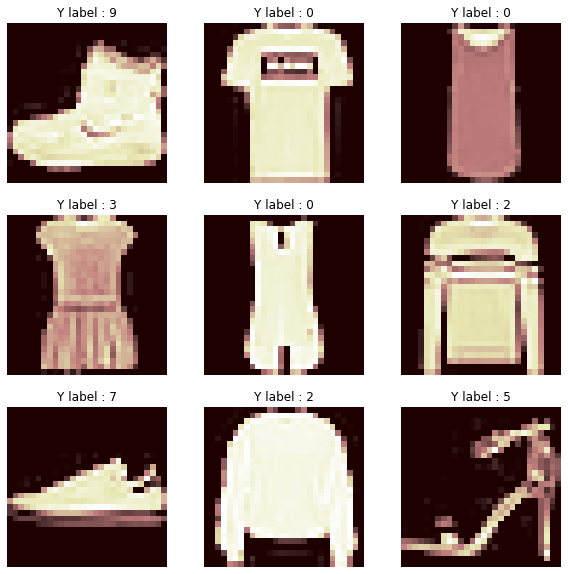

In [ ]:
plt.figure(figsize=(10, 10))

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.title('Y label : {}'.format(train_Y[i]))
  plt.axis('off')
  plt.imshow(train_X[i] ,cmap='pink')

plt.show()

In [ ]:
train_Y[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
print("train_X[0].shape :", train_X[0].shape)
print("train_X[0].ndim :", train_X[0].ndim)

train_X[0].shape : (28, 28)
train_X[0].ndim : 2


In [ ]:
# minibatch 고려
print("train_X.shape :", train_X.shape)
print("train_X.ndim :", train_X.ndim)

train_X.shape : (60000, 28, 28)
train_X.ndim : 3


In [ ]:
# 영상, 이미지 차원수 높아짐 ..


In [ ]:
print(np.min(train_X))
print(np.max(train_X))
# > 이상치 X : min-max norm

0
255


#### min-max

In [ ]:
train_X_norm = train_X / 255.0 #train_X = 0 이어서
print(np.min(train_X_norm))
print(np.max(train_X_norm))

0.0
1.0


In [ ]:
test_X_norm = test_X / 255.0

In [ ]:
Fmnist_Relu_DNN = tf.keras.Sequential([
                                       tf.keras.layers.Flatten(input_shape = (28,28)),
                                       tf.keras.layers.Dense(units=128, activation='relu'),
                                       tf.keras.layers.Dense(units=64, activation='relu'),
                                       tf.keras.layers.Dense(units=32, activation='relu'),
                                       tf.keras.layers.Dense(units=10, activation='softmax')
])

In [ ]:
Fmnist_Relu_DNN.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Fmnist_Relu_DNN.compile(optimizer=tf.keras.optimizers.Adam(),
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

In [ ]:
history = Fmnist_Relu_DNN.fit(train_X_norm, train_Y,
                              epochs=200,
                              batch_size=32,
                              validation_split=0.2,
                              callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])

Epoch 1/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5905 - accuracy: 0.7913 - val_loss: 0.4461 - val_accuracy: 0.8404
Epoch 2/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3978 - accuracy: 0.8534 - val_loss: 0.3816 - val_accuracy: 0.8609
Epoch 3/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3584 - accuracy: 0.8661 - val_loss: 0.3743 - val_accuracy: 0.8605
Epoch 4/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3339 - accuracy: 0.8774 - val_loss: 0.3517 - val_accuracy: 0.8720
Epoch 5/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3126 - accuracy: 0.8841 - val_loss: 0.3626 - val_accuracy: 0.8673
Epoch 6/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3009 - accuracy: 0.8879 - val_loss: 0.3601 - val_accuracy: 0.8704
Epoch 7/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2852 - accuracy: 0.8935 - val_loss: 0.3450 - val_ac

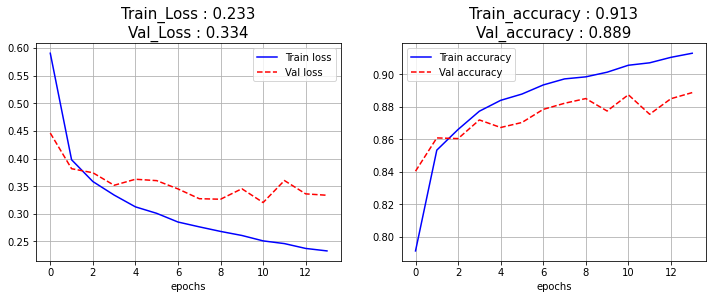

In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

val_loss = history.history['val_loss']
loss = history.history['loss']

plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)

plt.plot(history.history['loss'], 'b-', label = 'Train loss')
plt.plot(history.history['val_loss'], 'r--', label = 'Val loss')
plt.xlabel('epochs')

plt.title('Train_Loss : {:.3f}\nVal_Loss : {:.3f}'.\
          format(loss[-1], val_loss[-1]), fontsize = 15)

plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b-', label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label = 'Val accuracy')
plt.xlabel('epochs')

plt.title('Train_accuracy : {:.3f}\nVal_accuracy : {:.3f}'.\
          format(accuracy[-1], val_accuracy[-1]), fontsize = 15)

plt.legend()
plt.grid()
plt.show()

In [ ]:
pred_Y = Fmnist_Relu_DNN.predict(test_X_norm)
print(pred_Y[:5])

pred_Y_round = np.round(pred_Y, 3)
print(pred_Y_round[:5])

pred_Y_argmax = np.argmax(pred_Y_round, axis=1)
print(pred_Y_argmax[:10])

[[5.6974364e-10 7.8078891e-11 9.4850975e-08 9.4143271e-10 2.9894700e-06
  1.7438838e-04 3.7541899e-06 1.1029397e-03 6.2231076e-10 9.9871588e-01]
 [1.3152734e-05 1.0096532e-18 9.9895835e-01 4.2389872e-10 9.3256671e-04
  1.0292752e-20 9.5869174e-05 6.3069291e-27 6.2679155e-09 1.2504211e-13]
 [1.5755421e-11 1.0000000e+00 2.2680713e-11 6.9303199e-14 3.0436269e-20
  7.1319855e-12 1.6684583e-11 3.9236704e-22 7.8392605e-12 6.2833566e-18]
 [3.8096055e-09 1.0000000e+00 2.3661022e-08 2.6106464e-09 1.6854791e-13
  6.7717269e-11 6.5711552e-09 1.2725739e-18 3.6676029e-10 1.3988494e-14]
 [2.4407215e-02 4.1413742e-08 4.2317505e-03 1.2821688e-04 3.2431819e-03
  2.1784675e-11 9.6798050e-01 2.1561088e-14 9.1309657e-06 4.3444068e-11]]
[[0.    0.    0.    0.    0.    0.    0.    0.001 0.    0.999]
 [0.    0.    0.999 0.    0.001 0.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.024 0.    0.004 0.

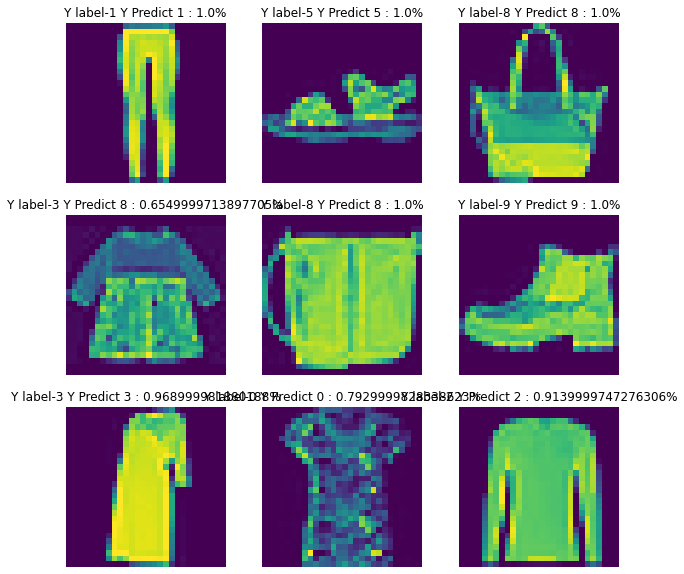

In [ ]:
plt.figure(figsize=(10,10))

for i in range(9):
  plt.subplot(3, 3, i+1)

  i = np.random.choice(range(0, 10000))

  plt.title("Y label-{} Y Predict {} : {}%".\
            format(test_Y[i], pred_Y_argmax[i], np.round(np.max(pred_Y_round[:][i]),3)))
  plt.axis('off')
  plt.imshow(test_X[i])

plt.show()